# Assignment 1

A previous assignment in Python that explores Bayes Theorem, Monte Carlo Simulations, and Data Preprocessing for training machine learning algorithms.

In [0]:
NAME = "Viet Nguyen"
STUDENT_ID = "vwnguyen"

## Problem 1 -  Bayes' Theorem

Suppose there exists a test to classify emails as spam or not spam based on the contained words. This test accurately identifies spam (if it is actually spam) 95% of the time. The prevalence of spam emails is 3 in 10. Also, if an email isn't spam, the test will incorrectly classify it as spam 5% of the time.

NOTE: For each of the following questions, please give each answer to at least 2 significant digit accuracy. To accomplish this, don't round off your results until the very last step of each calculation.

### a. What's the probability that an email picked at random is spam? What's the probability that an email picked at random isn't spam?

```
# This is formatted as code
```
\begin{equation}
P(S = random\:email\:is\:spam\:) = 3/10
\end{equation}

\begin{equation}
P(S = random\:email\:isn't\:spam\:) = 7/10
\end{equation}



### b. If you test an email and it reports positive for spam, what is the probability that it is spam?


\begin{equation}
  P(S = email\:is\:spam\:| E = test\:positive\:for\:spam ) = \frac{P(E|S) P(S)}{P(E)} 
\end{equation}

\begin{equation}
\frac{P(E|S) P(S)}{P(E)} = \frac{P(E|S) P(S)}{P(S)P(E|S) + P(\neg S)P(E|S)} = \frac{(0.95)(3/10)}{(0.95)(3/10) + (0.05)(7/10)} 
\end{equation}

\begin{equation}
  P(S = email\:is\:spam\:| E = test\:positive\:for\:spam ) = 0.89
\end{equation}

### c. If you test an email and it reports negative for spam, what is the probability that it is spam?

\begin{equation}
  P(S = email\:is\:spam\:| \neg E = test\:negative\:for\:spam ) = \frac{P(\neg E|S) P(S)}{P(\neg E)} 
\end{equation}

\begin{equation}
\frac{P(\neg E|S) P(S)}{P(\neg E)} = \frac{P(\neg E|S) P(S)}{P(S)P(\neg E|S) + P(\neg S)P(\neg E|S)} = \frac{(0.05)(3/10)}{(0.05)(3/10) + (0.95)(7/10)} 
\end{equation}

\begin{equation}
  P(S = email\:is\:spam\:| \neg E = test\:negative\:for\:spam ) = 0.02
\end{equation}

## Monte Carlo Simulations

Monte Carlo simulations can yield numeric solutions to probability problems that aren't possible to solve analytically. These simulations are also often easy to code up, and so also provide a way to check one's calculations for problems that amenable to analysis. So this is an important technique to become familiar with.

Basically, one creates a simulation of the situation, and runs many trials that allow one to estimate the probabilities by computing proportions. 

If you toss a coin 10 times, with what probability are you likely to see the subsequence {H, H, T, T} appear?

The simplicity of the Monte Carlo method makes it very powerful.

In [0]:
from numpy.random import randint
import numpy as np

num_tosses = 10    # tosses per trial
num_trials = 100000

# This sets the feedback interval so we know the program hasn't crashed.
feedback = int(np.round(num_trials / 10))

num_seq_found = 0   # to count the number of target subsequences detected
for t in range(1, num_trials + 1):
    
    # To see the progress.
    if t % feedback == 0:  
        print(np.round(100 * t / num_trials, 1), '%  complete:   prob =', num_seq_found / t)
        
    # Roll the die num_tosses times.
    trial = [randint(1, 3) for _ in range(num_tosses)]
    # Find the indices of all the 1s.
    heads = [i for i in range(num_tosses) if trial[i] == 1]
    
    # Search to see if after each 2 we have a 4 followed by a 6.
    for j in heads:
        if j < num_tosses - 3 and trial[j] == 1 and trial[j + 1] == 1 and trial[j + 2] == 2 and trial[j + 3] == 2:
            # We've found the target subsequence.
            num_seq_found += 1
    
print('Probability of this subsequence =', num_seq_found / num_trials)

10.0 %  complete:   prob = 0.4391
20.0 %  complete:   prob = 0.43825
30.0 %  complete:   prob = 0.43796666666666667
40.0 %  complete:   prob = 0.43705
50.0 %  complete:   prob = 0.43718
60.0 %  complete:   prob = 0.43728333333333336
70.0 %  complete:   prob = 0.4372714285714286
80.0 %  complete:   prob = 0.4374
90.0 %  complete:   prob = 0.43854444444444446
100.0 %  complete:   prob = 0.43845
Probability of this subsequence = 0.43845


## Problem 2  -  Monte Carlo Simulation

Consider two dice: One fair and one unfair. The unfair die has a 50% chance to land on the 6 face, and even chance for the rest of the faces.

The following Script that rolls both dice and computes the sum.

In [2]:
import numpy as np
from numpy.random import choice


# Python program to get average of a list 
def Average(lst): 
    length = len(lst)
    total = 0
    for i in lst:
      total = i + total
    return total/length

num_tosses = 2    # tosses per trial
num_trials = 100000
mean_sum = None
sum_list = []
fair_die_rolls = []
unfair_die_rolls= []

# This sets the feedback interval so we know the program hasn't crashed.
feedback = int(np.round(num_trials / 10))

num_seq_found = 0   # to count the number of target subsequences detected
for t in range(1, num_trials + 1):
    
    # To see the progress.
    if t % feedback == 0:  
        curr_mean_sum = Average(mean_list)
        print(np.round(100 * t / num_trials, 1), '%  complete:   curr_mean_sum =', curr_mean_sum)
        
    # Roll the fair and unfair die
    fair_dice = np.random.choice([1,2,3,4,5,6])
    unfair_dice = np.random.choice([1,2,3,4,5,6],p = [0.1,0.1,0.1,0.1,0.1,0.5])

    # compute the sum and mean
    sum = fair_dice + unfair_dice
    
    # append to lists
    sum_list.append(sum)
    fair_die_rolls.append(fair_dice)
    unfair_die_rolls.append(unfair_dice)

print('mean sum =', Average(mean_list))

10.0 %  complete:   curr_mean_sum = 8.00331
20.0 %  complete:   curr_mean_sum = 8.00331
30.0 %  complete:   curr_mean_sum = 8.00331
40.0 %  complete:   curr_mean_sum = 8.00331
50.0 %  complete:   curr_mean_sum = 8.00331
60.0 %  complete:   curr_mean_sum = 8.00331
70.0 %  complete:   curr_mean_sum = 8.00331
80.0 %  complete:   curr_mean_sum = 8.00331
90.0 %  complete:   curr_mean_sum = 8.00331
100.0 %  complete:   curr_mean_sum = 8.00331
mean sum = 8.00331


mean sum = 8


## Problem 3 - Data Processing



There are three types of data:

1.   **Numerical**: For example height, price of a good, heart rate and so on. These data are quantitative in nature.
2.   **Categorical**: While these are qualitative in nature. For example "Yes" or "No", "Red","Green" or "Blue" and "Doggo" or "Kitty".
3.   **Ordinal**: This is a combination of the above, for example movie ratings of 1-5.
 


Machine learning algorithms need data to work. Before you start applying machine learning, you must process your data into a form a machine learning model will expect. This is known as **data preprocessing**.  

The data we are working with pertains to the airline domain in India. It was used in a hackathon, where the goal was to predict airline prices given a set of *features*. First let's download a dataset, go to link http://download853.mediafire.com/orceo1u9llng/l7j86drkdln9aye/Data_Train.xlsx and download the Data_Train.xlsx. Then upload the file to your notebook (without renaming) by clicking on the File icon on the left side and then clicking "Upload" and upload the "Data_Train.xlsx" file.

Now that we have some data, we need the appropriate libraries to first read the data in and if need be manipulate the data for use in machine learning.

In [0]:
# We import pandas, a Python library that allows us to read in common data formats such as .csv, .xlsx, etc... 
# as a dataframe, essentially a matrix of features.
import pandas as pd
data = pd.read_excel('Data_Train.xlsx')  # Read in the data we downloaded
data.dropna(inplace=True)

In [0]:
# We can examine the data by looking at the first 5 entries using the head() function.
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Exploratory Data Analysis

Before we start processing we should examine our data. This is known as exploratory data analysis.

Use seaborn to carry out data exploratory analysis to observe the distribution of Airlines.

Comment on the distribution of Airlines and what this could mean for price prediction?

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

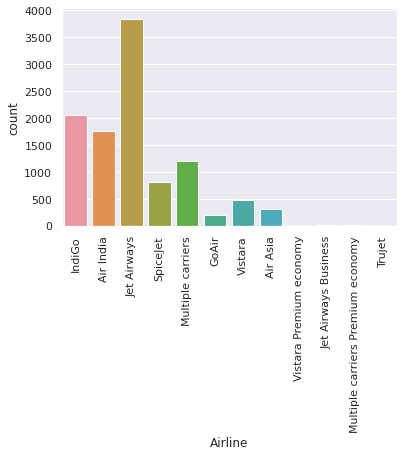

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns # Used for plotting
### YOUR CODE HERE ###
sns.set(style="darkgrid")
sns.countplot(x="Airline", data=data)
#uncomment this after you use seaborn
plt.xticks(rotation=90)

The price distribution seems to be not uniformly distibuted. This can make drawing a traditional trend line for price prediction difficult if it doesnt follow a specific model. Price prediction therefore would likely rely on analysis of the features beyond just the type of airline. 

### Data Preprocessing and Feature Engineering

We observe that this dataset has a mixture of data types ranging from: strings, date-time strings, and integers. 

Now we are ready to do some data preprocessing! Let's pretend we want to predict "Price", then it is reasonable to assume  "Airline", "Date_of_Journey", "Source", "Destination" , and "Route" could be useful features. We ignore "Dep_Time", "Arrival_Time" and "Duration". Similarly "Total_Stops" can be inferred from "Route" and "Additional_Info" could be useful in the future but for now we ignore it.

The goal of preprocessing is to handle any irregularities in the dataset such as missing values, awkwardly formatted entries and any other outlier cases (also known as data cleaning).
An example of a case we would need to deal with is in "Arrival_Time" row 1, the time and date is specified while other rows only have the time. A decision would have to be made whether or not to keep the date or just use the time. 

After our data is cleaned, we can confidently transform our data into the form machine learning models expect. Machine learning models are mathematical models and they work with vectors and matricies. Therefore after we finishing preprocessing we should have a dataframe of numbers i.e a matrix.

#### a) Processing: "Airline", "Source" and "Destination"

The data in these columns are strings and therefore not numerical. They must be transformed. There are several ways to do this transformation, but you can try the most simple method for this assignment. 

Given these columns transform the entries from strings to numerical data by:

i) First for **each** column define a **vocabulary**, that is a collection of all the unique words. 

ii) Second, with the knowledge of each unique word create mapping of each word to a unique integer.

iii) Third, with your mapping apply it to each column to complete the transformation to a numerical representation.

In [0]:
### YOUR CODE HERE ###
featureList = [ "Airline", "Source", "Destination" ]

# Step 1: Create a vocabulary for each column

airline_dict = { airline_name:i for i,airline_name in enumerate(data['Airline'].unique()) } 
source_dict = { source_name:i for i,source_name in enumerate(data['Source'].unique()) } 
dest_dict = { dest_name:i for i,dest_name in enumerate(data['Destination'].unique()) } 

# Step 2: Create a mapping function from each word in the vocabulary to a unique integer
def integer_encode_airline_name(airline_name):
    return airline_dict[airline_name]

def integer_encode_source_name(source_name):
    return source_dict[source_name]

def integer_encode_dest_name(dest_name):
    return dest_dict[dest_name]

# Step 3: Replce all words in the original data with the assigned integers
data['Airline'] = data['Airline'].apply(integer_encode_airline_name)
data['Source'] = data['Source'].apply(integer_encode_source_name)
data['Destination'] = data['Destination'].apply(integer_encode_dest_name)
data.head()
data[:100]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,24/03/2019,0,0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,1,1,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,9/06/2019,2,2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,0,12/05/2019,1,1,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,0,01/03/2019,0,0,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
95,0,21/06/2019,3,3,MAA → CCU,05:15,07:40,2h 25m,non-stop,No info,3540
96,3,15/05/2019,0,4,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
97,2,3/06/2019,0,4,BLR → DEL,19:50,22:50,3h,non-stop,In-flight meal not included,6478
98,2,18/06/2019,4,5,BOM → HYD,07:05,08:30,1h 25m,non-stop,No info,8040


In [0]:
data.keys()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [0]:
data.head()
data[:10]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,24/03/2019,0,0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,1/05/2019,1,1,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,9/06/2019,2,2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,0,12/05/2019,1,1,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,0,01/03/2019,0,0,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,3,24/06/2019,1,1,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,2,12/03/2019,0,0,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,2,01/03/2019,0,0,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,2,12/03/2019,0,0,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,4,27/05/2019,2,2,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


#### b) Processing: "Date_of_Journey"

i) The entries in this column cannot be understood by any machine learning model as is. We must transform them to numerical representation.

Using pandas separate the dates into separate "Months" and "Weekdays". 


In [0]:
# Overwrite column to be in datatime format
# That is: YYYY/MM/DD -> YYYY-MM-DD
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

In [0]:
data['Date_of_Journey']

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]

In [0]:
data['Date_of_Journey'].dt.day_name()

0           Sunday
1         Saturday
2           Friday
3         Thursday
4         Thursday
           ...    
10678    Wednesday
10679     Saturday
10680     Saturday
10681     Thursday
10682     Thursday
Name: Date_of_Journey, Length: 10682, dtype: object

In [0]:
data['day_of_week'] =  data['Date_of_Journey'].dt.day_name()

In [0]:
data['day_of_week']

0           Sunday
1         Saturday
2           Friday
3         Thursday
4         Thursday
           ...    
10678    Wednesday
10679     Saturday
10680     Saturday
10681     Thursday
10682     Thursday
Name: day_of_week, Length: 10682, dtype: object

In [0]:
data['Journey_Month'] = data['Date_of_Journey'].dt.month_name()

In [0]:
data['Journey_Month']

0            March
1          January
2        September
3         December
4          January
           ...    
10678    September
10679        April
10680        April
10681      January
10682    September
Name: Journey_Month, Length: 10682, dtype: object

In [0]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_week,Journey_Month
0,0,2019-03-24,0,0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,March
1,1,2019-01-05,1,1,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,January
2,2,2019-09-06,2,2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday,September
3,0,2019-12-05,1,1,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Thursday,December
4,0,2019-01-03,0,0,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Thursday,January


ii) Now that you have these new columns, are these features ready for a machine learning model? Please explain.


These features are not quite ready for a machine learning model. Machine learning algorithms interpret data numerically, the modified columns are currently categorized by strings, we would need to further process and encode this data in some method to transform it into usable features.

#### c) Processing: Route

Processing "Route" is tricky as they are all different lengthed strings. Why is this a problem? It doesn't have to be if we feed our algorithm an entry one by one but that can be slow. We want to utilize the fact computers are designed to do matrix operations quickly.

To preprocess the "Route" column do the following:

i) Separate the strings by the empty string using split().

ii) Determine a vocabulary made up of each unique airport code and you may include the arrow that separates the codes.

iii) Using this vocabulary information devise a way to make sure all the strings/features are the same size and **NO NEED TO IMPLEMENT** it. Discuss why you choose that method and any limitations you can think of. [HINT: Think about the vocabulary approach from above and an approach called one hot encoding.]


In [0]:
### YOUR CODE HERE ###
data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [0]:
# Python program to check 
# to get unique values from list 
# using set  
# function to get unique values 
def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list

route_list = [ str(route_name) for route_name in data['Route'].unique() ] 
unique_list = unique(route_list)

master_list = []
for item in unique_list:
  for i in item.split():
    master_list.append(i)

print("vocab list")
airport_vocab_list = unique(master_list)
print(airport_vocab_list)

vocab list
['AMD', 'BLR', 'IXU', 'KNU', 'IXA', 'GWL', 'JDH', 'DED', 'BDQ', 'IXC', 'MAA', 'BHO', 'CCU', 'RPR', 'BBI', 'DEL', 'UDR', 'HYD', 'NDC', 'IXR', 'JAI', 'NAG', 'VTZ', '→', 'IDR', 'VGA', 'BOM', 'STV', 'IXB', 'GAU', 'COK', 'TRV', 'IMF', 'ATQ', 'GOI', 'LKO', 'IXZ', 'PNQ', 'ISK', 'HBX', 'JLR', 'PAT', 'VNS']


In [0]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_week,Journey_Month
0,0,2019-03-24,0,0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,March
1,1,2019-01-05,1,1,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,January
2,2,2019-09-06,2,2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday,September
3,0,2019-12-05,1,1,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Thursday,December
4,0,2019-01-03,0,0,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Thursday,January


Answer to part (iii) 

Using this vocabulary information devise a way to make sure all the strings/features are the same size and NO NEED TO IMPLEMENT it. Discuss why you choose that method and any limitations you can think of. [HINT: Think about the vocabulary approach from above and an approach called one hot encoding.]

Using the vocabulary approach from above we can assign each airport code with a 
unique integer ID. After doing this, we can then apply one-hot encoding 
using pd.concat. This will allow every airport code to have a unique bit pattern consisting of exactly one 1. Encoding this way allows us to turn the airport IDs into a binary value, which can be used by a machine learning algorithm to analyze flight routes based on these features.  

There are however some limitations with one hot encoding, the first being that for many features, the one hot encoding representation can be very large, resulting in a sparse matrix. Additionally, one hot encoding does not preserve  the route order. Every airport is mapped to a unique bit pattern, but the routes themselves are not mapped, and would have to be represented through some other method, such as multi-hot encoding. 



#### d) Feature Engineering
Consider the "Airline" column from part a) each airline is mapped to a unique integer. Imagine a scenario where we have hundreds of unique airlines, the airline mapped to 100 for example would be weighted more than the airline mapped to 1. Similarly for columns "Source" and "Destination". To fix this discrepancy, we utilize standardization or normalization.

Use standarization to map all the values in these columns to the range [0,1] by using the following expression: 

```scaled_value = (value - min) / (max - min)```.

In [0]:
def normalize(dct):
  std_dct = dict()
  max_val = max(dct.values())
  min_val = min(dct.values())
  for key in dct:
    scaled_val = ( dct.get(key) - min_val) / (max_val - min_val)
    std_dct[key] = scaled_val
  return std_dct

standardized_airline_dict = normalize(airline_dict)
standardized_source_dict = normalize(source_dict)
standardized_dest_dict = normalize(dest_dict)

print('airline standardized')
print(standardized_airline_dict)
print('source standardized')
print(standardized_source_dict)
print('dest standardized')
print(standardized_dest_dict)

# data['Airline'] = data['Airline'].apply(integer_encode_airline_name)
data.head()

airline standardized
{'IndiGo': 0.0, 'Air India': 0.09090909090909091, 'Jet Airways': 0.18181818181818182, 'SpiceJet': 0.2727272727272727, 'Multiple carriers': 0.36363636363636365, 'GoAir': 0.45454545454545453, 'Vistara': 0.5454545454545454, 'Air Asia': 0.6363636363636364, 'Vistara Premium economy': 0.7272727272727273, 'Jet Airways Business': 0.8181818181818182, 'Multiple carriers Premium economy': 0.9090909090909091, 'Trujet': 1.0}
source standardized
{'Banglore': 0.0, 'Kolkata': 0.25, 'Delhi': 0.5, 'Chennai': 0.75, 'Mumbai': 1.0}
dest standardized
{'New Delhi': 0.0, 'Banglore': 0.2, 'Cochin': 0.4, 'Kolkata': 0.6, 'Delhi': 0.8, 'Hyderabad': 1.0}


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_week,Journey_Month
0,0,2019-03-24,0,0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,March
1,1,2019-01-05,1,1,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,January
2,2,2019-09-06,2,2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday,September
3,0,2019-12-05,1,1,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Thursday,December
4,0,2019-01-03,0,0,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Thursday,January


In [0]:

data['Airline'] = data['Airline'].replace(airline_dict.values(),standardized_airline_dict.values()) 
data['Source'] = data['Source'].replace(source_dict.values(),standardized_source_dict.values()) 
data['Destination'] = data['Destination'].replace(dest_dict.values(),standardized_dest_dict.values()) 

In [0]:
data[:100]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_week,Journey_Month
0,0.000000,2019-03-24,0.00,0.0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,March
1,0.090909,2019-01-05,0.25,0.2,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,January
2,0.181818,2019-09-06,0.50,0.4,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday,September
3,0.000000,2019-12-05,0.25,0.2,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Thursday,December
4,0.000000,2019-01-03,0.00,0.0,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,2019-06-21,0.75,0.6,MAA → CCU,05:15,07:40,2h 25m,non-stop,No info,3540,Friday,June
96,0.272727,2019-05-15,0.00,0.8,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257,Wednesday,May
97,0.181818,2019-03-06,0.00,0.8,BLR → DEL,19:50,22:50,3h,non-stop,In-flight meal not included,6478,Wednesday,March
98,0.181818,2019-06-18,1.00,1.0,BOM → HYD,07:05,08:30,1h 25m,non-stop,No info,8040,Tuesday,June
